In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from root_numpy import tree2array,array2tree,array2root
import ROOT

plt.rcParams['figure.figsize'] = (5.0, 4.0)

Welcome to JupyROOT 6.10/02
CPU times: user 1.75 s, sys: 443 ms, total: 2.19 s
Wall time: 2.9 s


20437


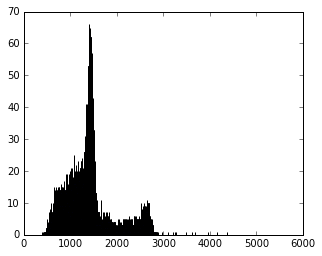

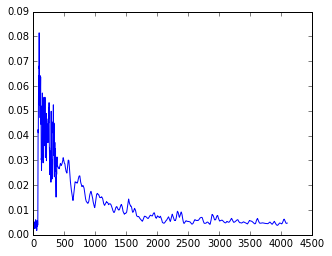

1040.38


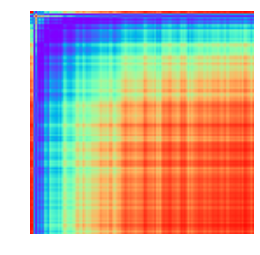

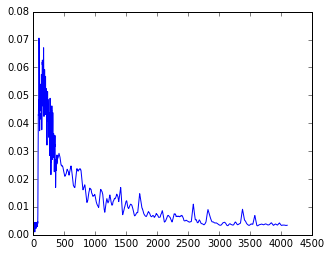

1529.23


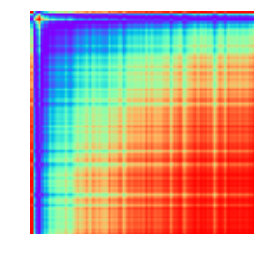

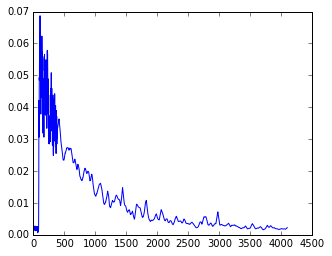

2539.29


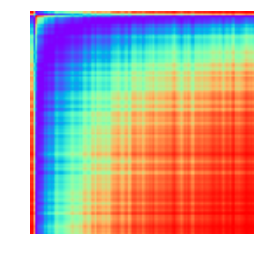

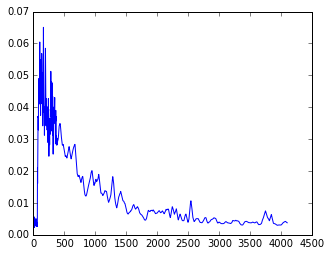

1328.66


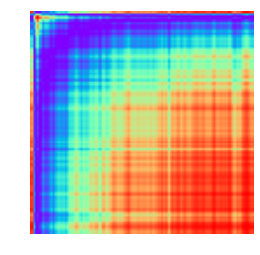

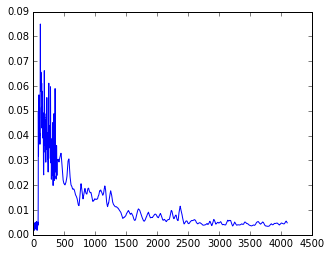

1211.53


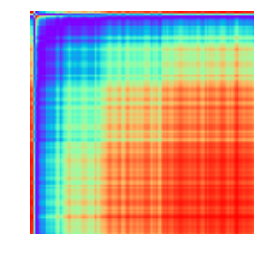

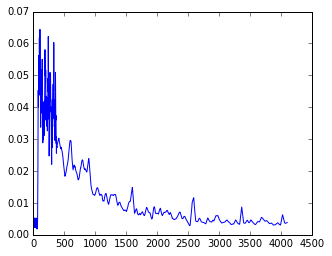

1410.55


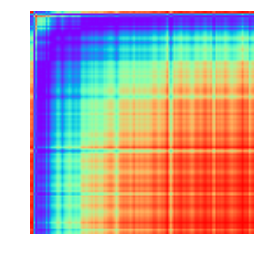

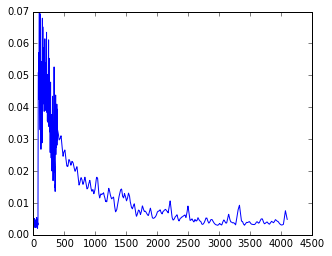

1406.31


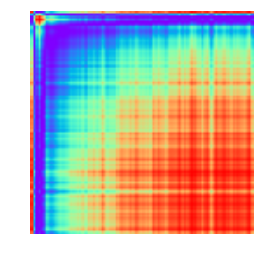

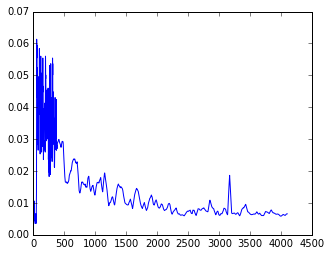

682.381


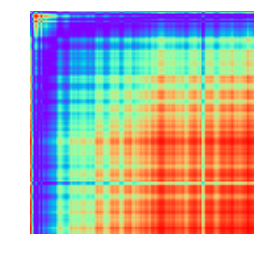

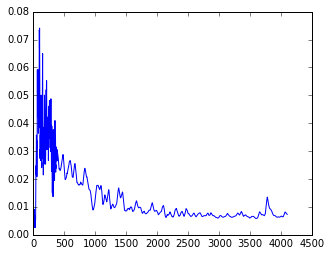

593.494


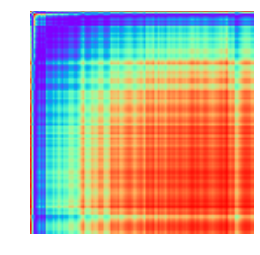

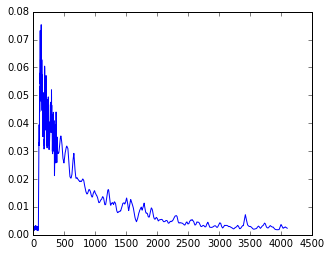

2657.95


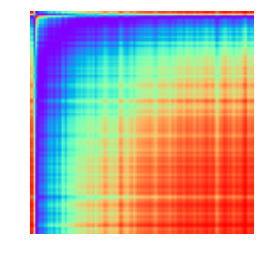

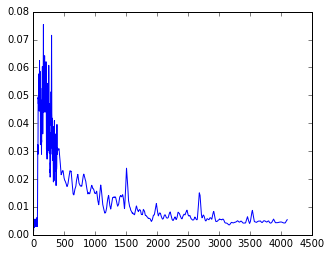

1044.82


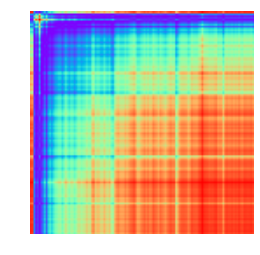

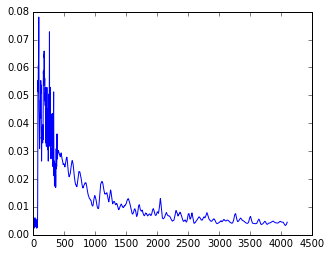

1190.1


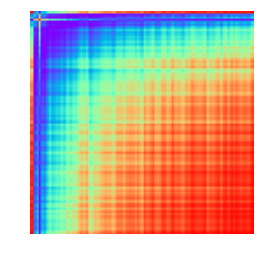

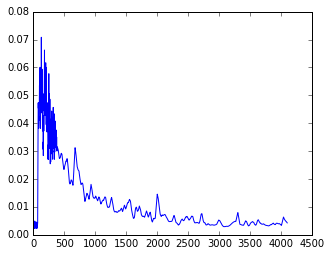

1511.59


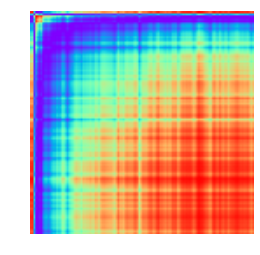

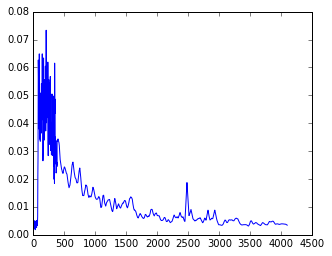

1326.43


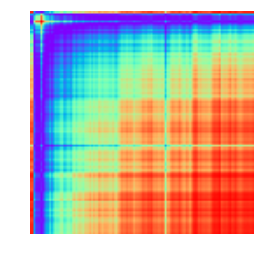

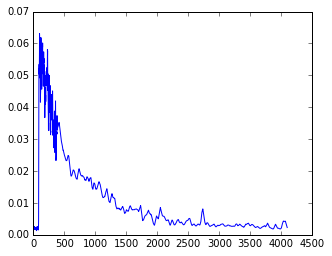

2617.21


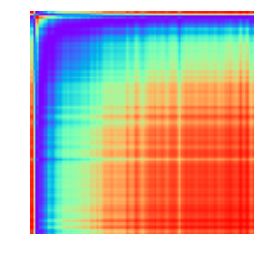

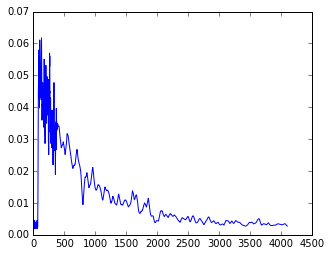

1529.8


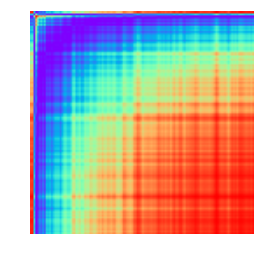

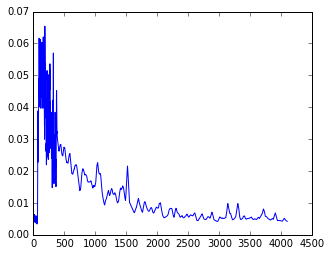

1149.34


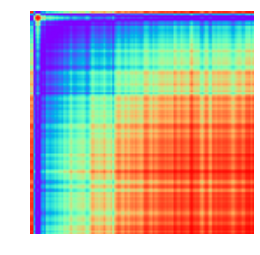

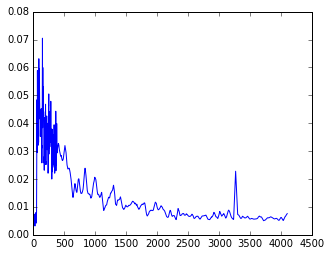

818.089


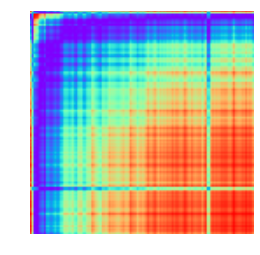

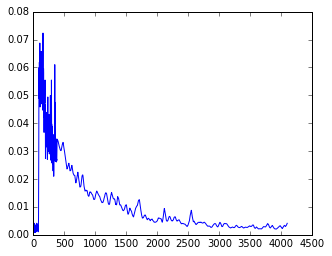

1822.3


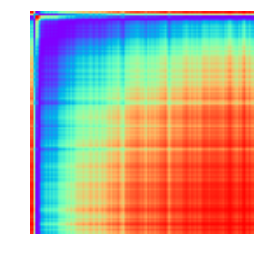

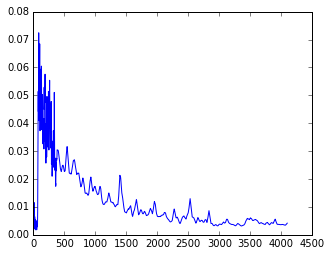

1485.34


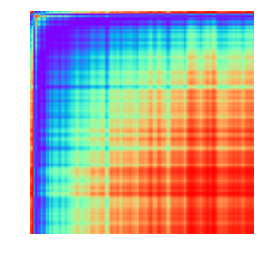

CPU times: user 39.9 s, sys: 4.12 s, total: 44.1 s
Wall time: 42 s


In [11]:
%%time

file = "PSDPara1_less_15.root" # The dataset produced that gives the most number of accurate representation of pilled up events
# file = "PSD_less_15.root"
# file = "LS.root"
# file = "LS_BETA.root"
# file = "RefPulse009.root"
# file = "out.root"
# file = "Run009/Run009-079-001.root"
data = "PMTALL"
tree = "tree"
energy = "Energy"

rfile = ROOT.TFile(file)
intree = rfile.Get(tree)
treer = tree2array(intree)
pmtall = tree2array(intree, branches=data)
energy = tree2array(intree, branches=energy)

print(len(energy))
energy = energy[:,1]

plt.figure()
plt.hist(energy,bins=np.arange(0,6000,1))
plt.show()

def reader_pmt(path):
    extra = np.arange(4096, 4480)
    x_file = ROOT.TFile(path)
    x_tree = x_file.Get("tree")
    x_pmtall = tree2array(x_tree, branches="PMTALL")
    x = np.delete(x_pmtall, extra, axis=1)
    return x

def viewer(x):
    y = abs(x-15200)
    z = normalize(y, norm="l2")
    return z

pmtall = reader_pmt(file)
ipmtall = viewer(pmtall)

from pyts.visualization import plot_mtf, plot_gasf, plot_gadf, plot_recurrence_plots

for i in range(20):
    k = np.random.randint(len(energy))
    plt.figure()
    plt.plot(np.arange(4096),ipmtall[k])
    plt.show()
    print(energy[k])
    plot_gasf(pmtall[k], image_size=128, overlapping=False, scale='-1')
    plt.show()


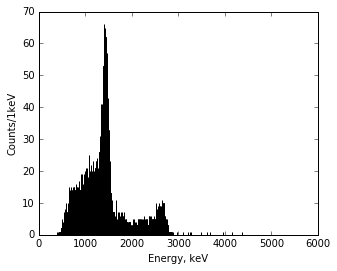

In [12]:
plt.figure()
plt.hist(energy,bins=np.arange(0,6000,1))
plt.xlabel("Energy, keV")
plt.ylabel("Counts/1keV")
plt.savefig("psdpara1histo.png")
plt.show()

# plt.figure()
# plt.plot(np.arange(4096),ipmtall[2])
# plt.savefig("waveform.png")
# plt.show()

# print(energy[k])
# plot_gasf(pmtall[2], image_size=256, overlapping=False, scale='-1')
# plt.savefig("GASF.png")
# plt.show()

2256


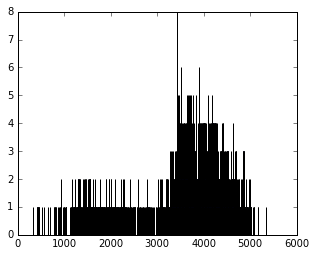

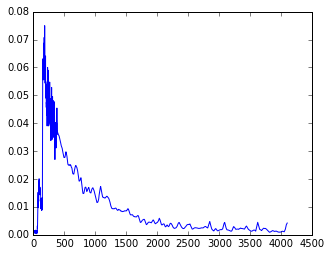

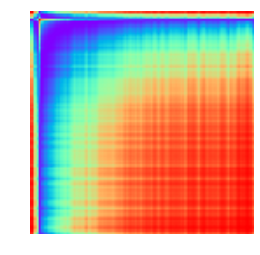

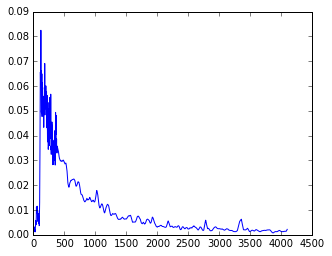

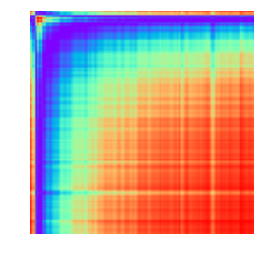

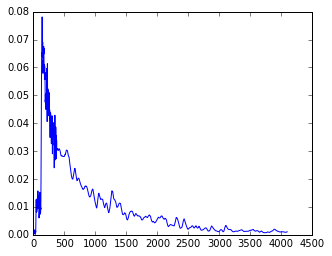

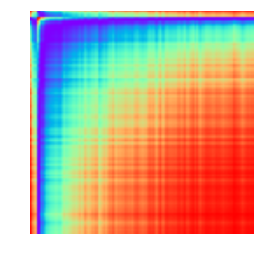

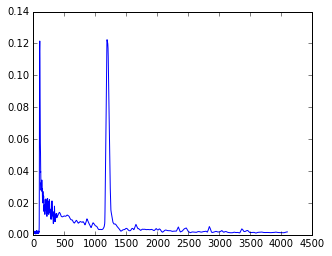

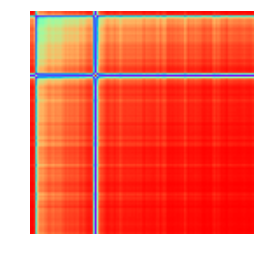

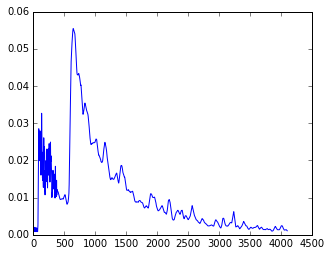

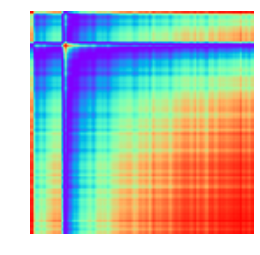

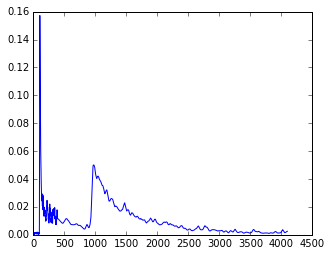

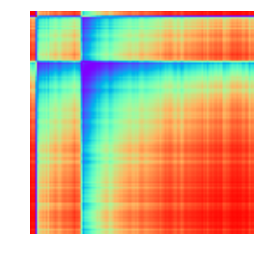

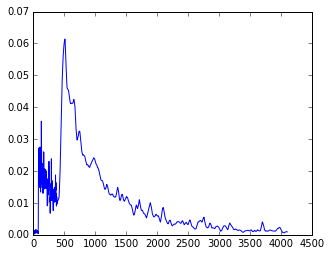

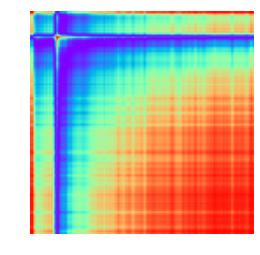

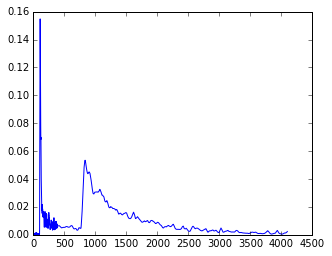

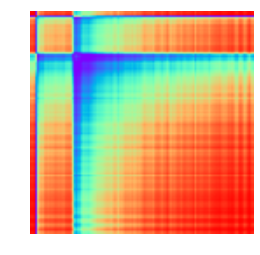

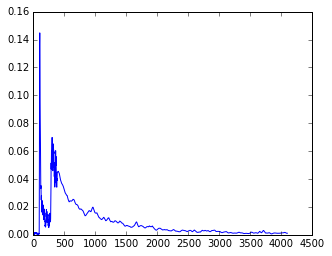

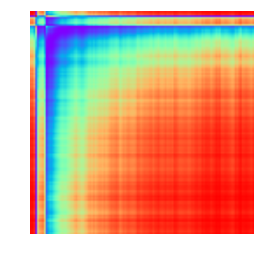

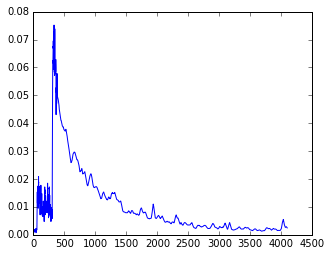

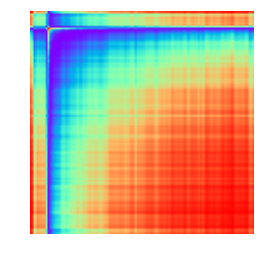

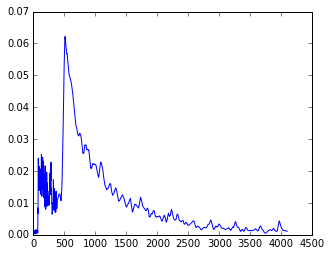

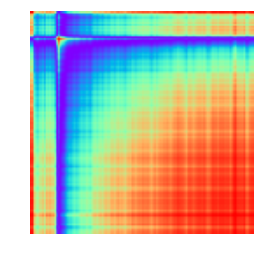

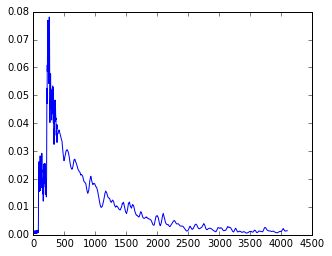

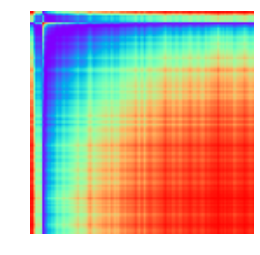

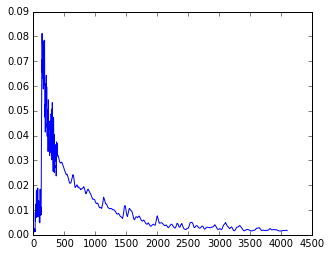

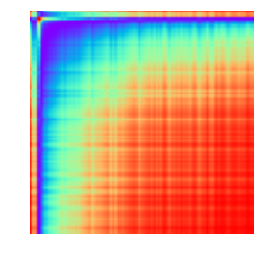

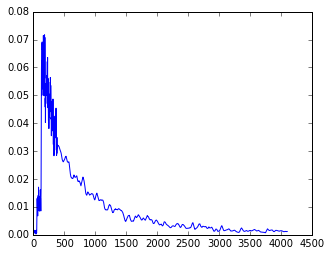

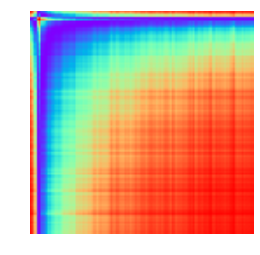

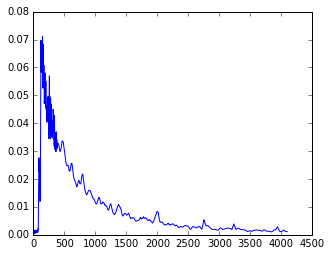

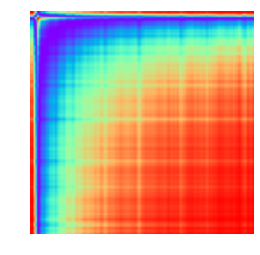

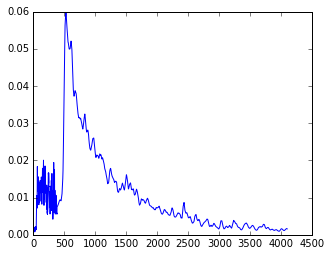

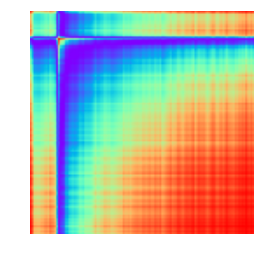

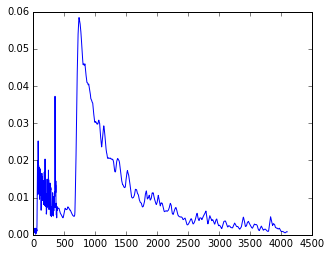

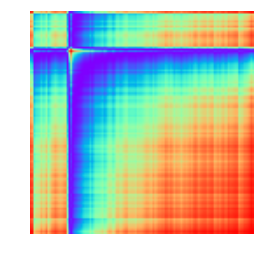

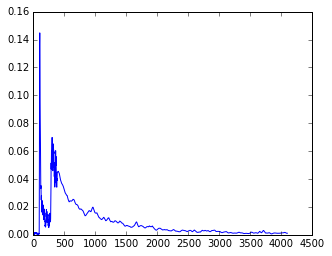

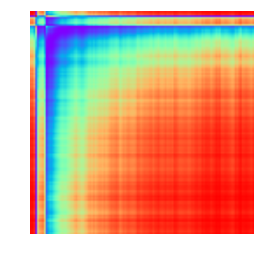

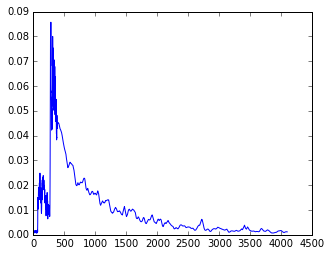

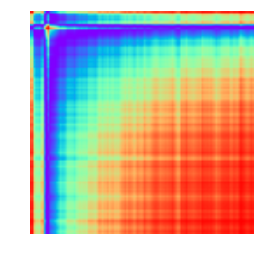

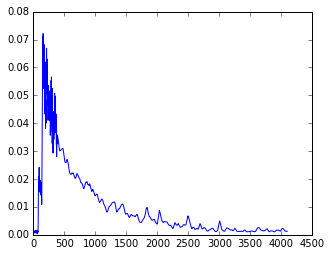

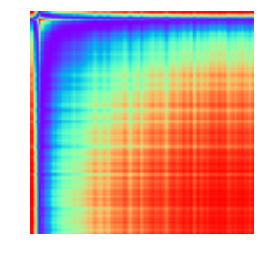

In [4]:
file = "Piled_alt.root"
rfile = ROOT.TFile(file)
intree = rfile.Get("tree")
treer = tree2array(intree)
pmtall = tree2array(intree, branches="PMTALL")
energy = tree2array(intree, branches="Energy")

print(len(energy))
energy = energy[:,1]

plt.figure()
plt.hist(energy,bins=np.arange(0,6000,1))
plt.show()

def reader_pmt(path):
    extra = np.arange(4096, 4480)
    x_file = ROOT.TFile(path)
    x_tree = x_file.Get("tree")
    x_pmtall = tree2array(x_tree, branches="PMTALL")
    x = np.delete(x_pmtall, extra, axis=1)
    return x

def viewer(x):
    y = abs(x-15200)
    z = normalize(y, norm="l2")
    return z

pmtall = reader_pmt(file)
ipmtall = viewer(pmtall)

from pyts.visualization import plot_mtf, plot_gasf, plot_gadf, plot_recurrence_plots

for i in range(20):
    k = np.random.randint(len(energy))
    plt.figure()
    plt.plot(np.arange(4096),ipmtall[k])
    plt.show()
    plot_gasf(pmtall[k], image_size=128, overlapping=False, scale='-1')
    plt.show()



# OLD DO not run !

In [ ]:
plt.show()

In [5]:
import numpy as np
from scipy.stats import norm
	
n_samples = 10
n_features = 48
n_classes = 2
	
delta = 0.5
dt = 1
x = 0.
	
X = np.zeros((n_samples, n_features))
X[:, 0] = x
	
for i in range(n_samples):
    start = x
    for k in range(1, n_features):
        start += norm.rvs(scale=delta**2 * dt)
        X[i][k] = start
	
y = np.random.randint(n_classes, size=n_samples)
print(X)

[[  0.00000000e+00   2.65809718e-01   1.92658271e-01   9.63478362e-02
   -4.38860532e-02   1.51931805e-01   3.74107628e-01   4.58991682e-01
    9.04130601e-01   4.46501075e-01   4.92070901e-01   4.32117838e-01
    3.26125993e-01   2.19729996e-01   2.74306965e-01   1.77289372e-01
   -1.07545700e-01   5.08269872e-02  -3.88850870e-01  -8.47352624e-01
   -5.98839524e-01  -9.11146558e-01  -8.56173267e-01  -7.18864322e-01
   -5.65100791e-01  -1.00506345e+00  -1.31360982e+00  -1.10949503e+00
   -1.11595386e+00  -7.10403234e-01  -1.15523550e+00  -1.14035008e+00
   -1.30934661e+00  -7.78417472e-01  -1.18844113e+00  -1.20258128e+00
   -1.58871228e+00  -1.49252805e+00  -1.15032134e+00  -9.44829871e-01
   -7.61480550e-01  -1.43699604e+00  -1.38685543e+00  -1.25652169e+00
   -1.50981507e+00  -1.43161644e+00  -1.37127304e+00  -1.68622290e+00]
 [  0.00000000e+00   8.00850385e-03  -2.85405429e-01  -4.86766853e-01
   -5.28602343e-01  -3.26098762e-01  -7.06031820e-01  -5.49766820e-01
   -5.62265963e-01 